In [1]:
import numpy as np
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                        n_classes=2,n_clusters_per_class=1,hypercube=False,random_state=41,class_sep=20)

In [2]:
import matplotlib.pyplot as plt


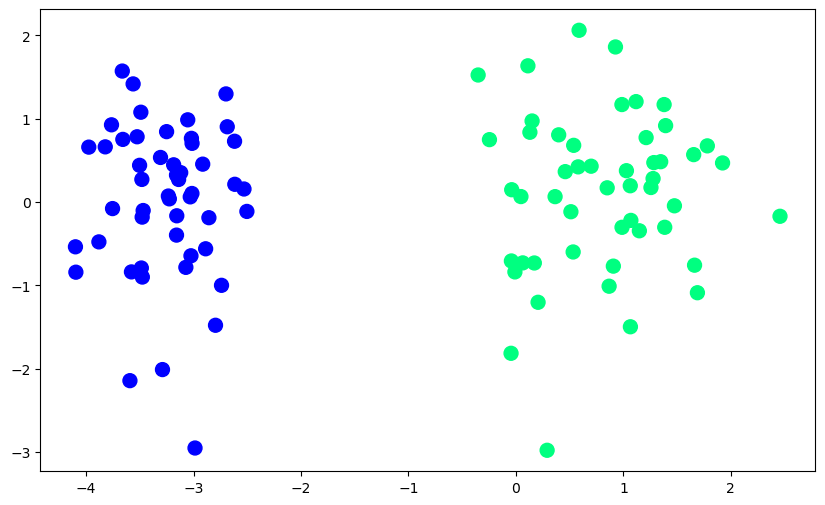

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
lr=LogisticRegression(penalty='none',solver='sag')
lr.fit(X,y)

C:\Users\ranja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ranja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [6]:
print(lr.coef_)
print(lr.intercept_)

[[5.07504422 0.25389478]]
[5.96752581]


In [7]:
m=-(lr.coef_[0][0]/lr.coef_[0][1])
b=-(lr.intercept_/lr.coef_[0][1])

In [8]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

Now implememant Gradient

In [21]:
def gradi(X,y):
    X=np.insert(X,0,1,axis=1)
    lr=0.2
    weights=np.ones(X.shape[1])
    for i in range(100000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
    return weights[1:],weights[0]

In [22]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [23]:
coef_,intercept_ = gradi(X,y)

In [24]:
m1 = -(coef_[0]/coef_[1])
b1 = -(intercept_/coef_[1])

In [25]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m1*x_input1 + b1

(-3.0, 2.0)

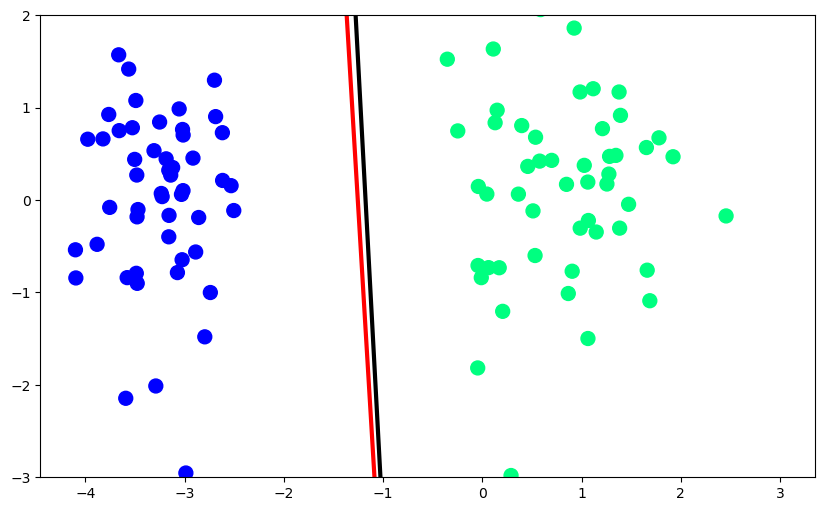

In [26]:
plt.figure(figsize=(10,6))
plt.plot(x_input1,y_input1,color='red',linewidth=3)
plt.plot(x_input,y_input,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)